In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os

def matrixPlotRuns (accuracy, precision, recall, f1scores, path, name):
    if not os.path.exists(path):
        os.makedirs(path)
        
    #accuracy = np.array([10, 50 ,40])
    #precision = np.array([50, 40, 30])

    acc_mean = np.mean(accuracy)
    prec_mean = np.mean(precision)
    rec_mean = np.mean(recall)
    f1_mean = np.mean(f1scores)

    acc_std = np.std(accuracy)
    prec_std = np.std(precision)
    rec_std = np.std(recall)
    f1_std = np.std(f1scores)

    labels = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
    x_pos = np.arange(len(labels))
    #CTEs = [tp_mean, fp_mean, fn_mean, tn_mean]
    #error = [tp_std, fp_std, fn_std, tn_std]
    CTEs = [acc_mean, prec_mean, rec_mean, f1_mean]
    error = [acc_std, prec_std, rec_std, f1_std]


    fig, ax = plt.subplots()
    #ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
    ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
    ax.set_ylabel('Value of Score')
    ax.set_xticks(x_pos)
    ax.set_xticklabels(labels)
    ax.set_title('Average values in set of runs: ' + name)
    ax.yaxis.grid(True)
    plt.ylim(0, 1)
    plt.yticks(np.arange(0, 1.1, 0.1))


    # Save the figure
    plt.tight_layout()
    plt.savefig(path + '\\scoresAvg')
    #plt.show()

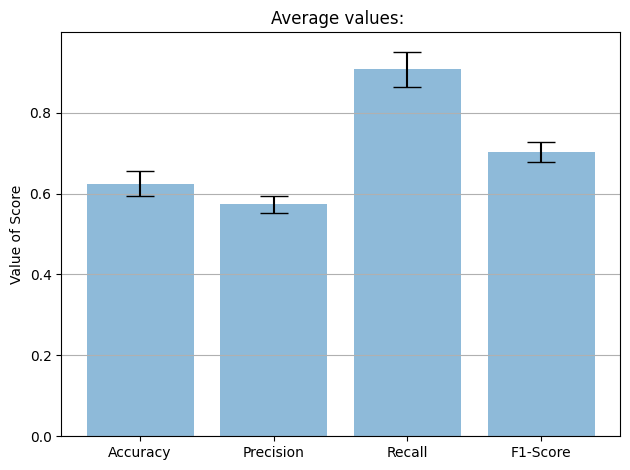

In [3]:
import pandas as pd

scoreTable = pd.read_excel("results\\scores.xlsx")
scoreTable

matrixPlotRuns(scoreTable['Accuracy'].values, scoreTable['Precision'].values, scoreTable['Recall'].values, scoreTable['F1'].values, "results", "2024-08-01-13-57")

#scoreTable['Accuracy'].values

In [5]:
d = {'Run': [1, 2], 'Accuracy': [0.63, 0.55], 'Precision':[0.90, 0.91], 'Recall': [0.76, 0.77], 'F1': [0.71,0.70]}

pdFrame = pd.DataFrame(data = d)

,Run,Accuracy,Precision,Recall,F1
0,1,0.63,0.90,0.76,0.71
1,2,0.55,0.91,0.77,0.70
